[05/24/23 15:26:16] INFO     Loading data from 'dataset' (PickleDataSet)...                     ]8;id=730764;file:///home/pslowiq/programs/pdl2023/dl-skin-lesion-recognition/env/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=826056;file:///home/pslowiq/programs/pdl2023/dl-skin-lesion-recognition/env/lib/python3.10/site-packages/kedro/io/data_catalog.py#343\343]8;;\

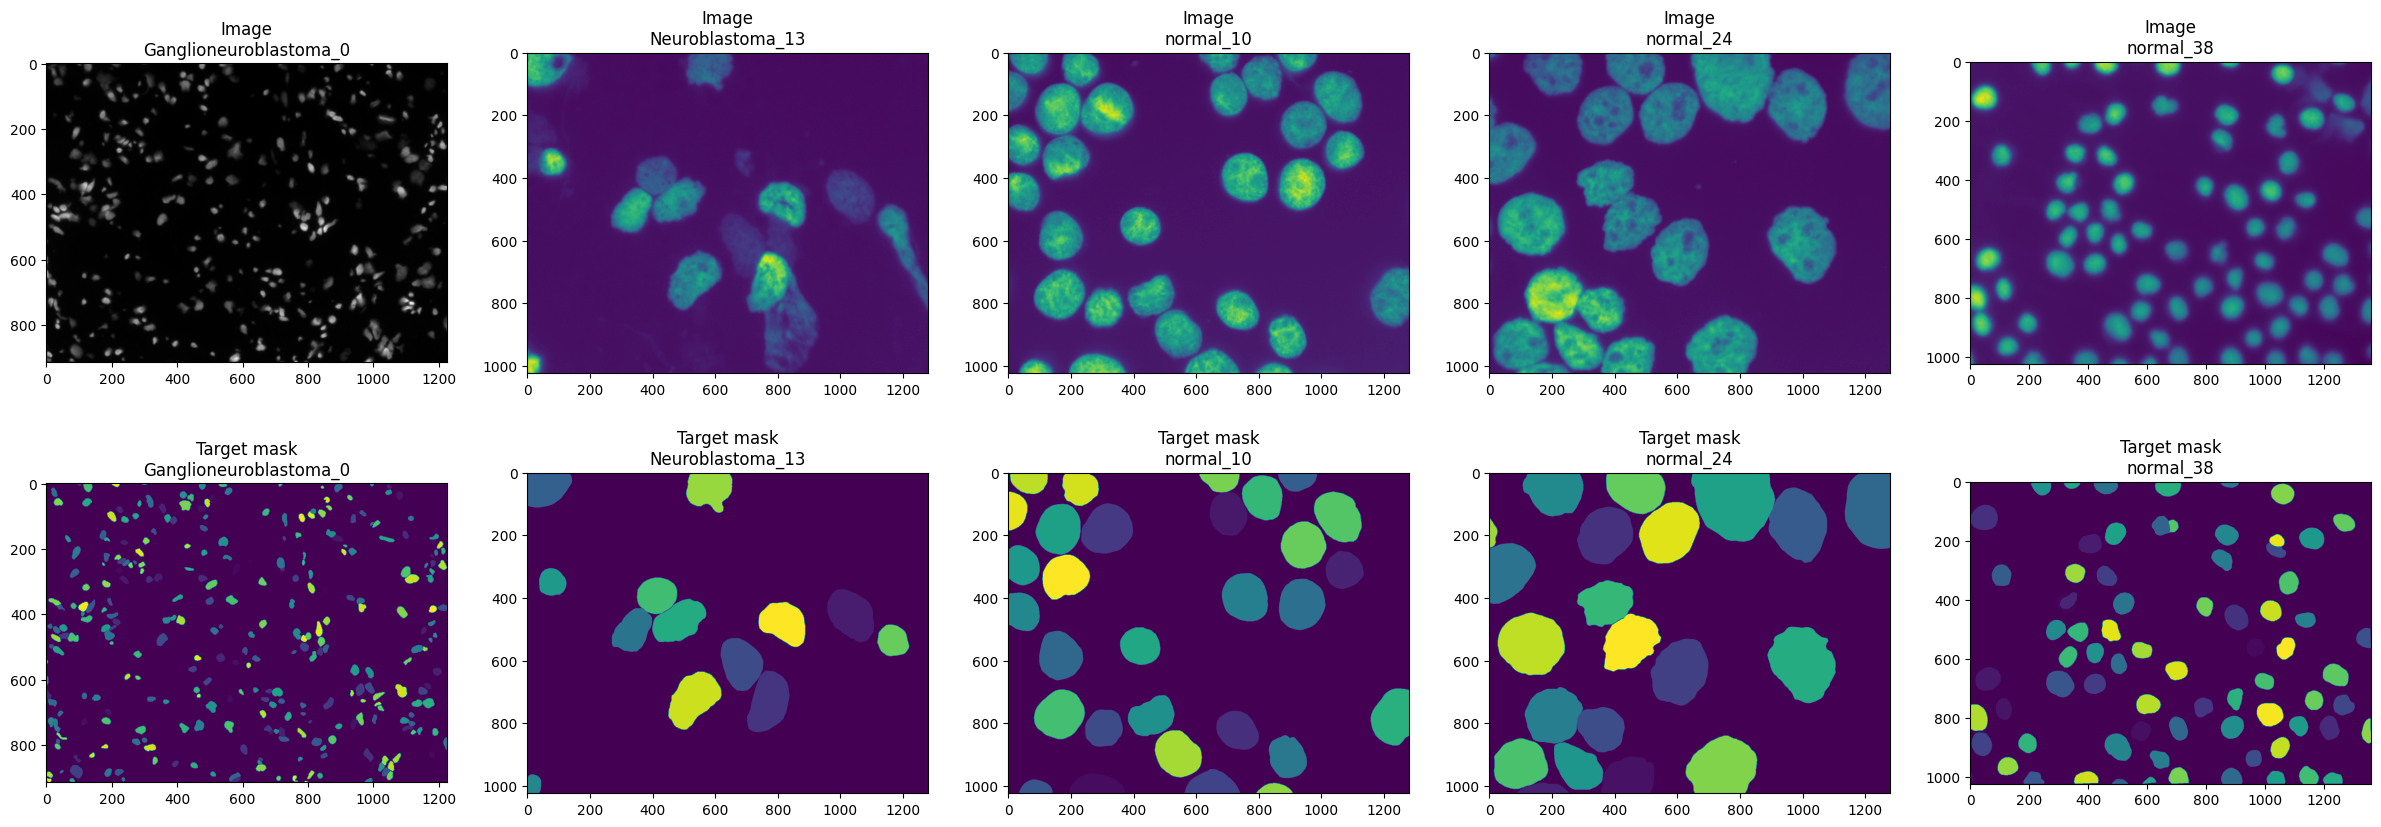

In [48]:
dataset = catalog.load("dataset")

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,10))

take_n_every = 15

for j in range(5):
        axes[0][j].imshow(np.transpose(dataset[j*take_n_every][0], (1, 2, 0)))
        axes[0][j].set_title('Image\n' + dataset.get_image_name(j*take_n_every))
        axes[1][j].imshow(np.transpose(dataset[j*take_n_every][1], (1, 2, 0)))
        axes[1][j].set_title('Target mask\n' + dataset.get_target_name(j*take_n_every))
